## Importing necessary libraries

In [101]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import re

import warnings
warnings.filterwarnings('ignore')

## Loading The Dataset

In [102]:
df = pd.read_csv("CarPrice_Assignment.csv")

## Exploring The Data

In [103]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [104]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [105]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [107]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [108]:
df.duplicated().sum()

np.int64(0)

In [109]:
df.describe(include=object)

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,peugeot 504,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


 ## Data Cleaning

In [110]:
# see the unique values
df['CarName'].unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 4

In [111]:
# create a function to fix the CarName column
def clean_car_name(car_name):
    return car_name.split(" ")[0].lower()

In [112]:
# apply the clean_car_name function to the CarName column
df['CarName'] = df['CarName'].apply(clean_car_name)

In [113]:
# df[['CarName', 'ModelName']] = df['CarName'].str.split(' ', n=1, expand=True)


In [114]:
# see the unique values after fixing
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [115]:
# Fix typos
df['CarName'] = df['CarName'].str.replace('vw', 'volkswagen')
df['CarName'] = df['CarName'].str.replace('vokswagen', 'volkswagen')
df['CarName'] = df['CarName'].str.replace('toyouta', 'toyota')
df['CarName'] = df['CarName'].str.replace('maxda', 'mazda')
df['CarName'] = df['CarName'].str.replace('porcshce', 'porsche')


In [116]:
# see the unique values after fixing typos
df['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

## Analyzing and visualization

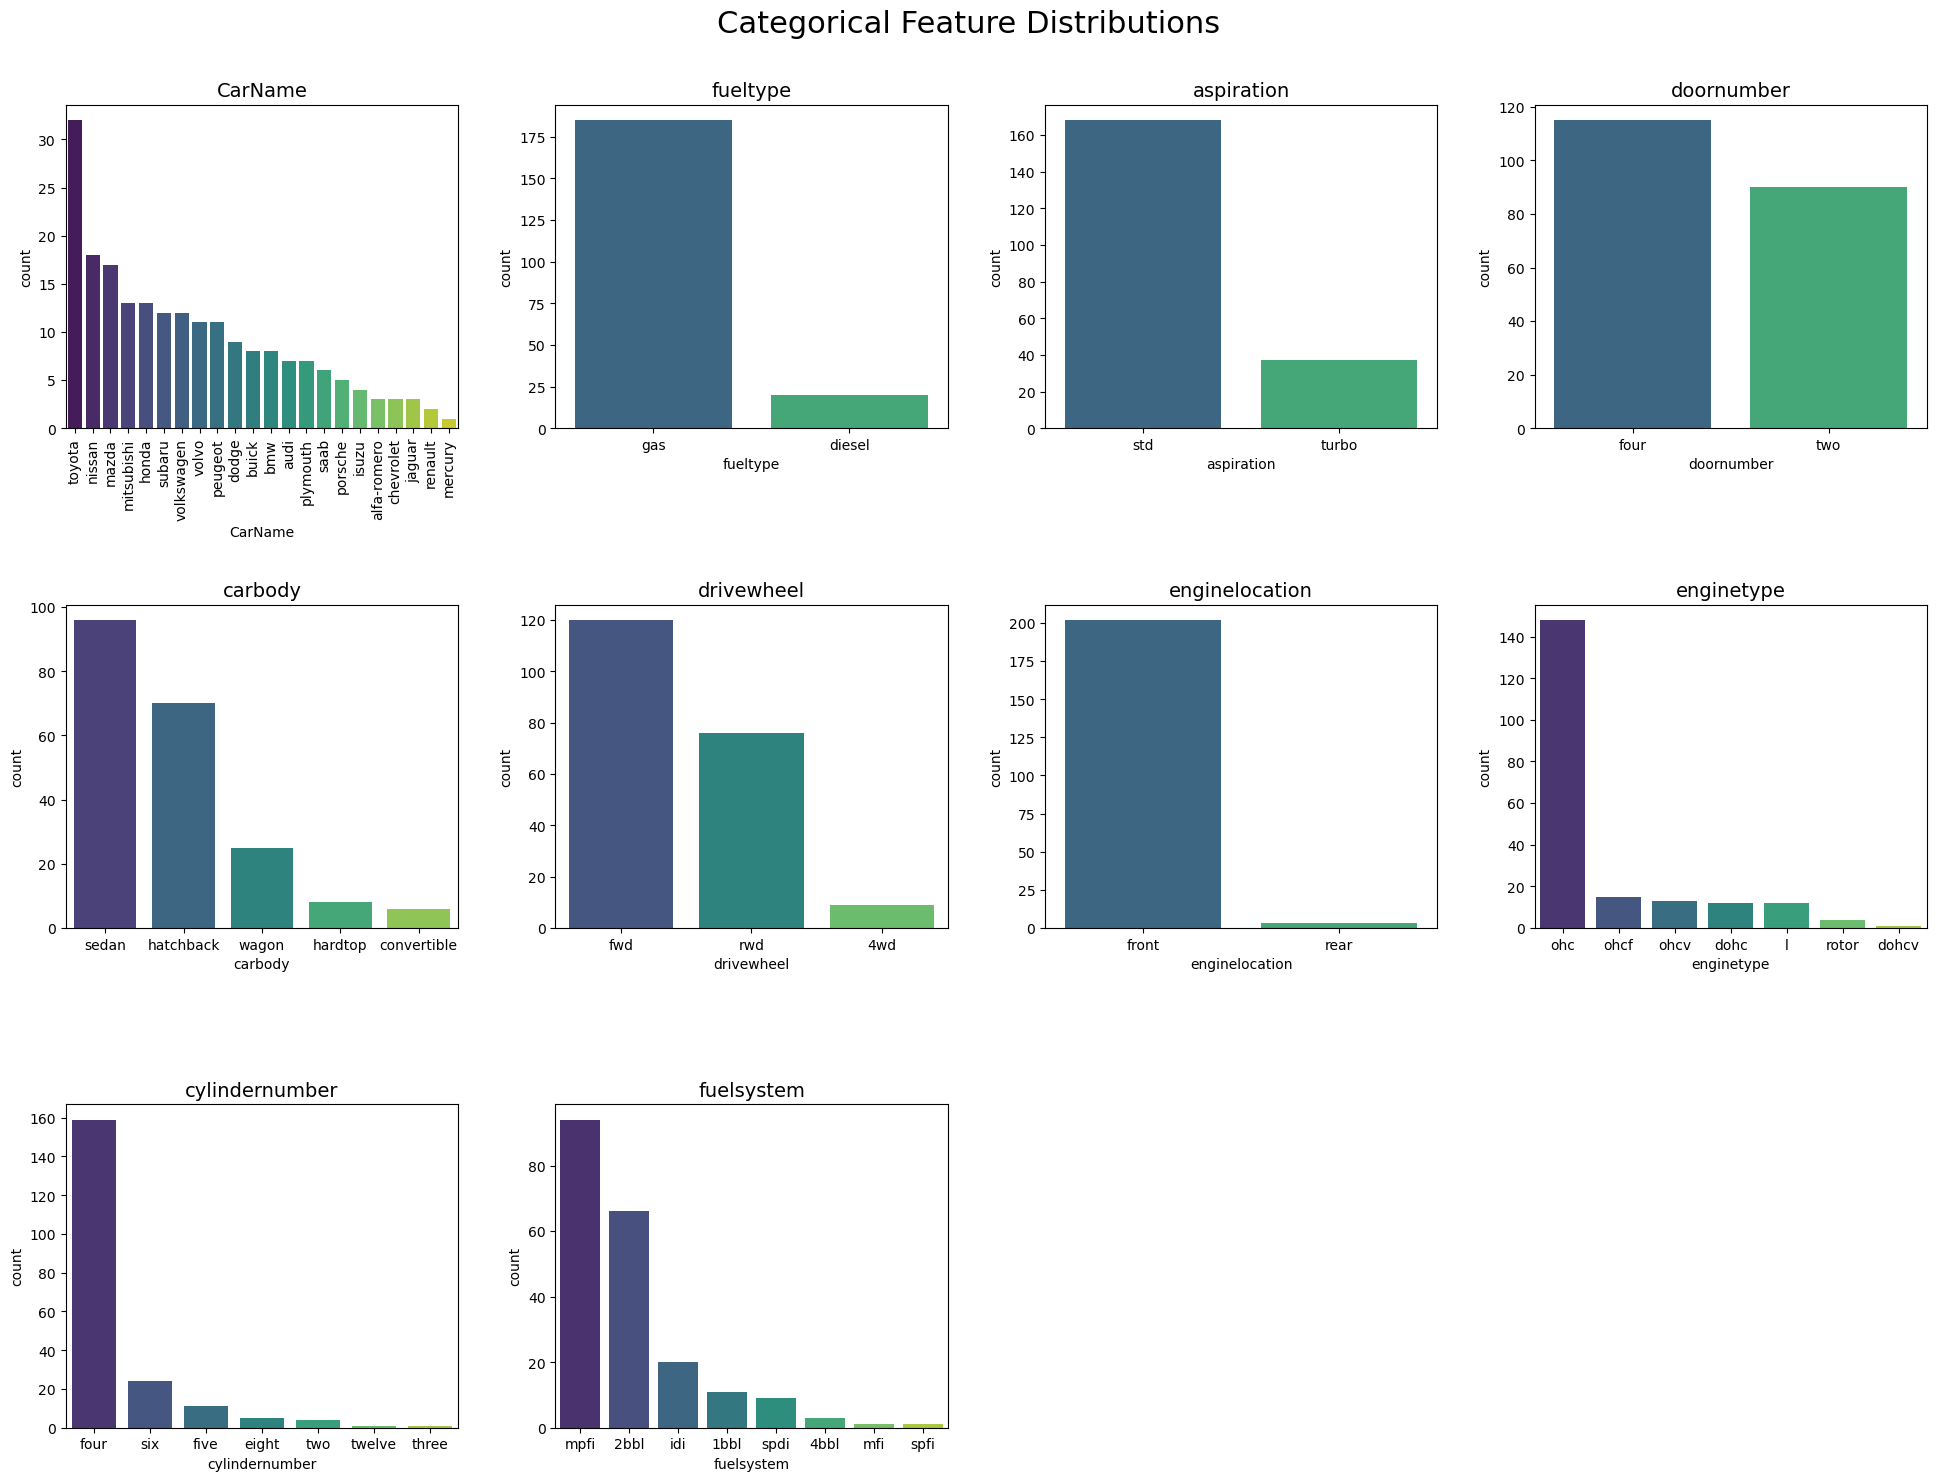

In [117]:


plt.figure(figsize=(20, 20))
plt.suptitle('Categorical Feature Distributions', fontsize=22)

# Loop through categorical columns
for i, col in enumerate(df.select_dtypes(include='object').columns, 1):
    plt.subplot(4, 4, i)
    sns.countplot(data=df, x=col, palette='viridis', order=df[col].value_counts().index)
    plt.title(col, fontsize=14)
    if col == 'CarName':
        x = 90
    else:
        x = 0
    plt.xticks(rotation=x)
    plt.tight_layout(pad=3.0)

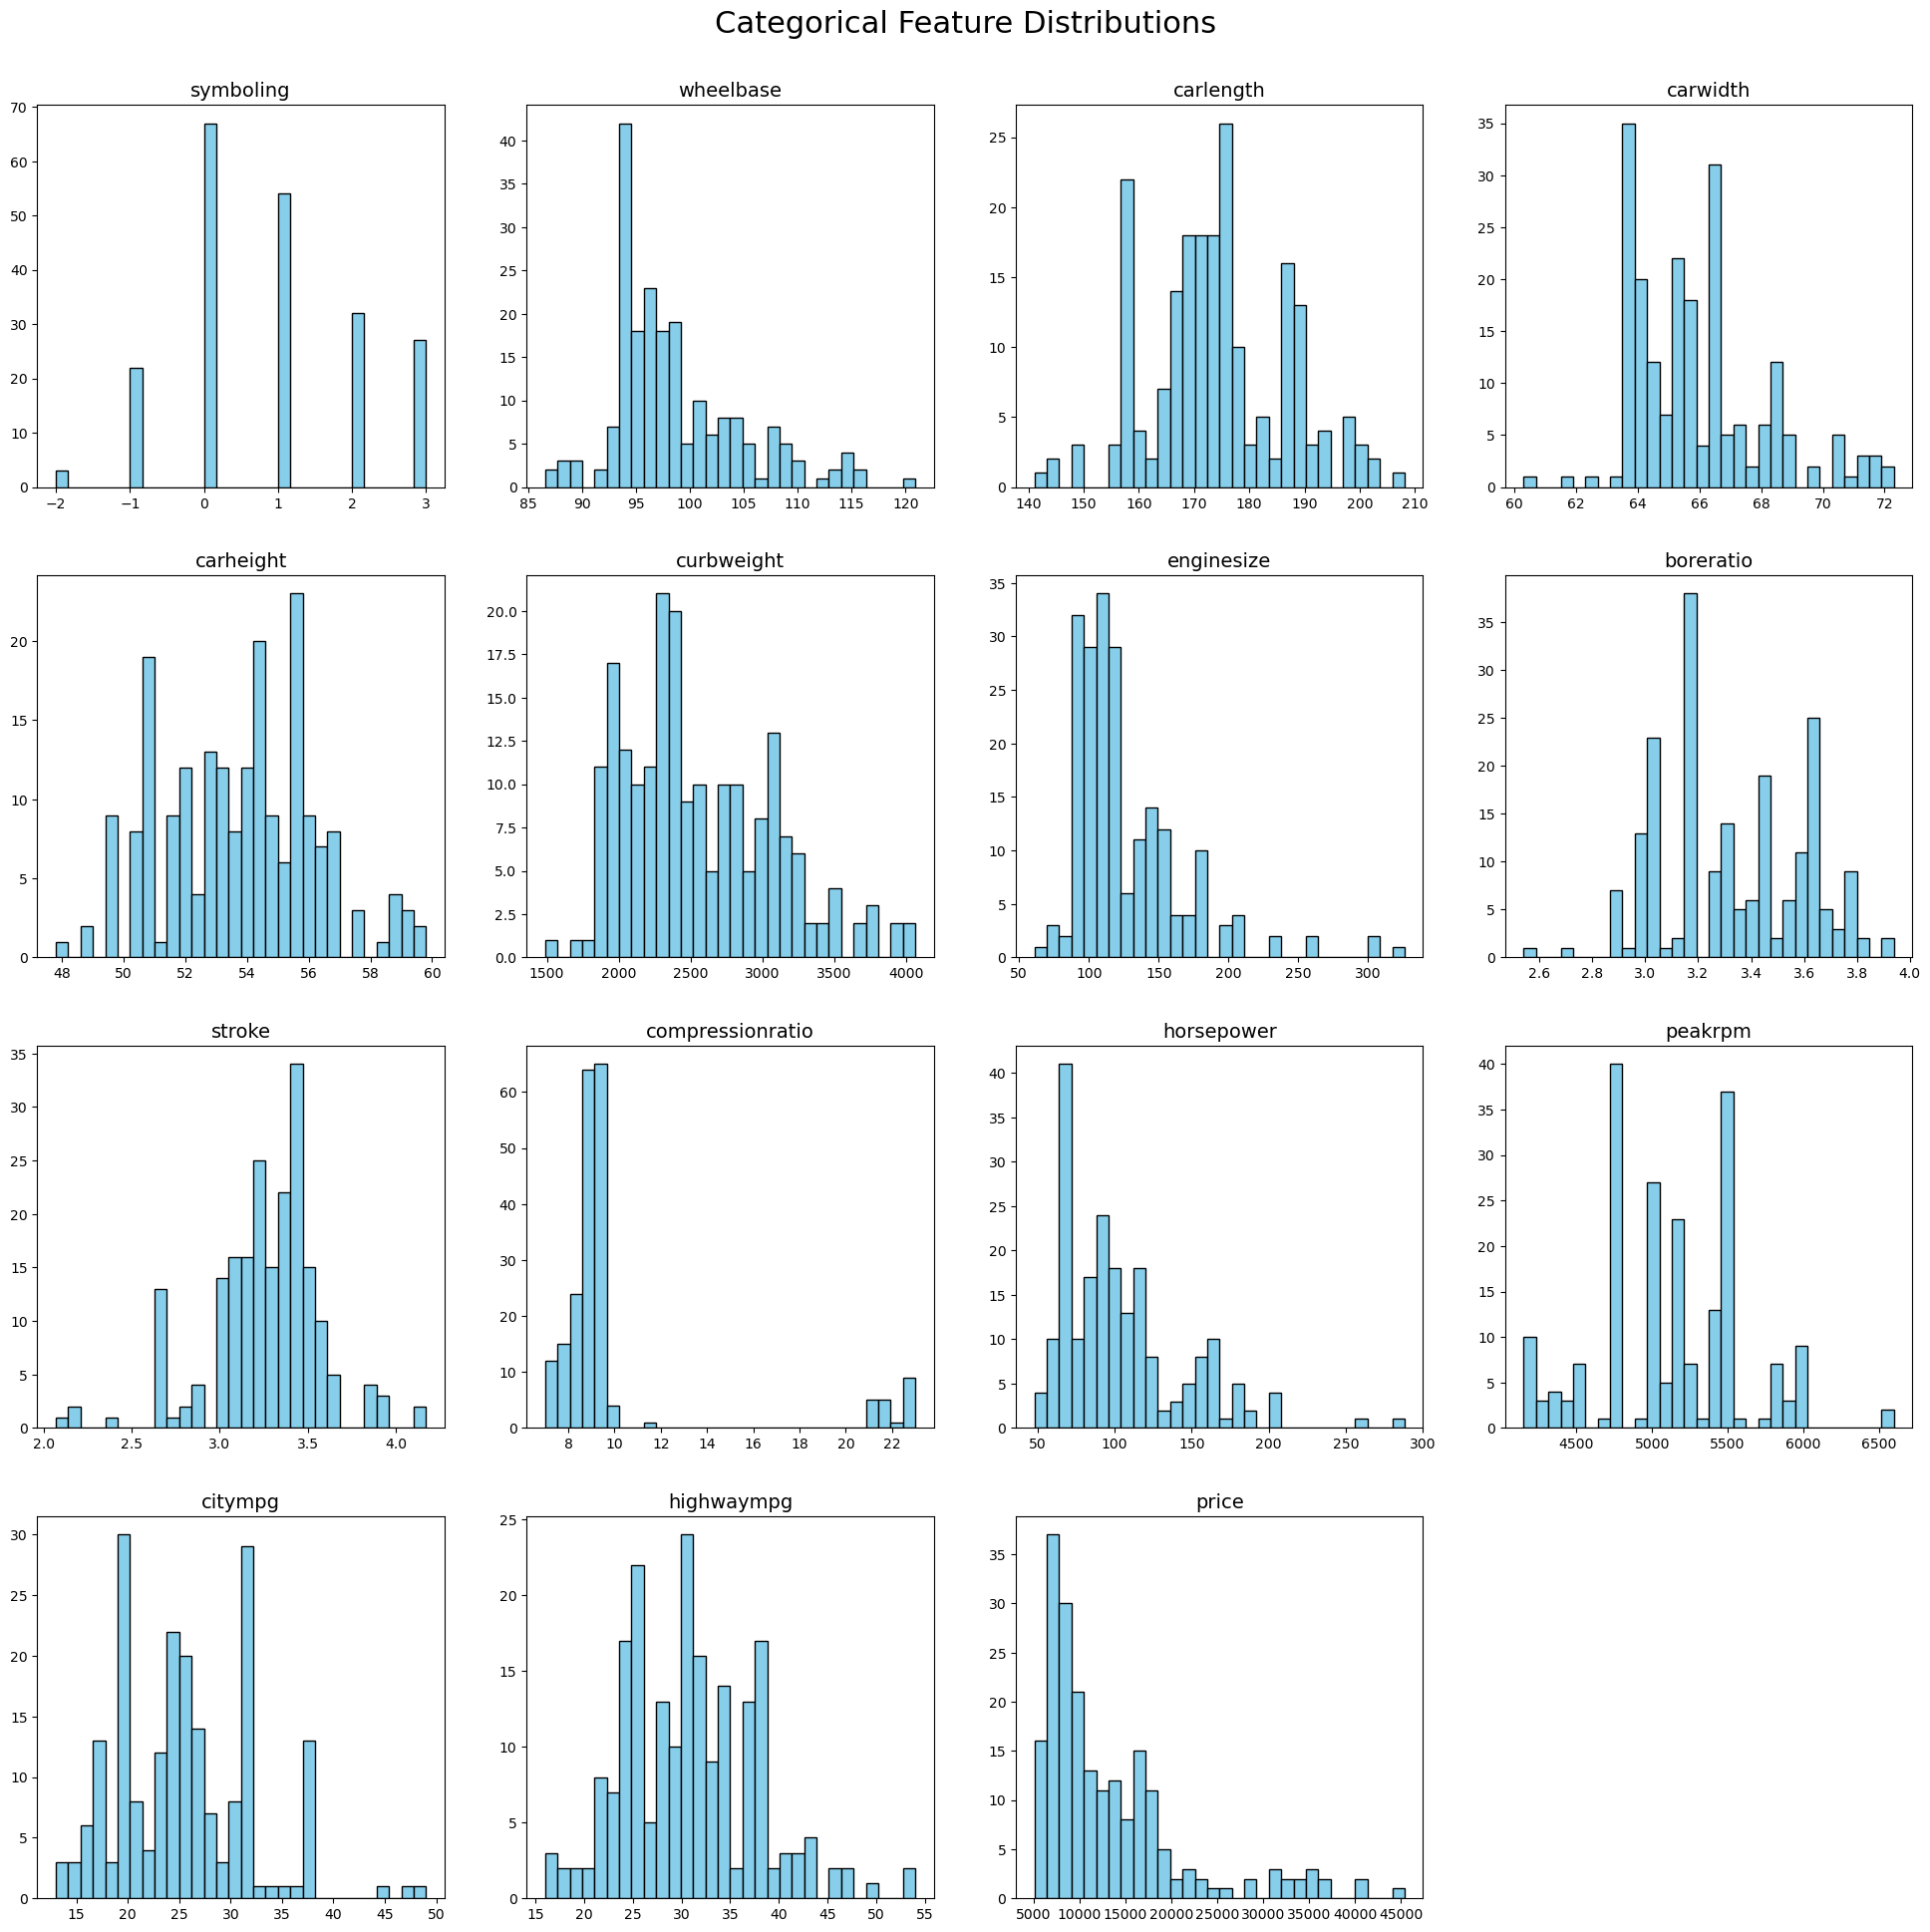

In [118]:

plt.figure(figsize=(20, 20))
plt.suptitle('Categorical Feature Distributions', fontsize=22)

# Loop through categorical columns
for i, col in enumerate(df.drop('car_ID',axis=1).select_dtypes(include='number').columns, 1):
    plt.subplot(4, 4, i)
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(col, fontsize=14)
    plt.xticks(rotation=x)
    plt.tight_layout(pad=3.0)


In [119]:
# list each of Categorical and Numerical columns
categorical_columns = df.select_dtypes(include=object).columns.tolist()
numerical_columns = df.select_dtypes(exclude=object).columns.tolist()

**now we will visualize the relation between each categorical column and price column**

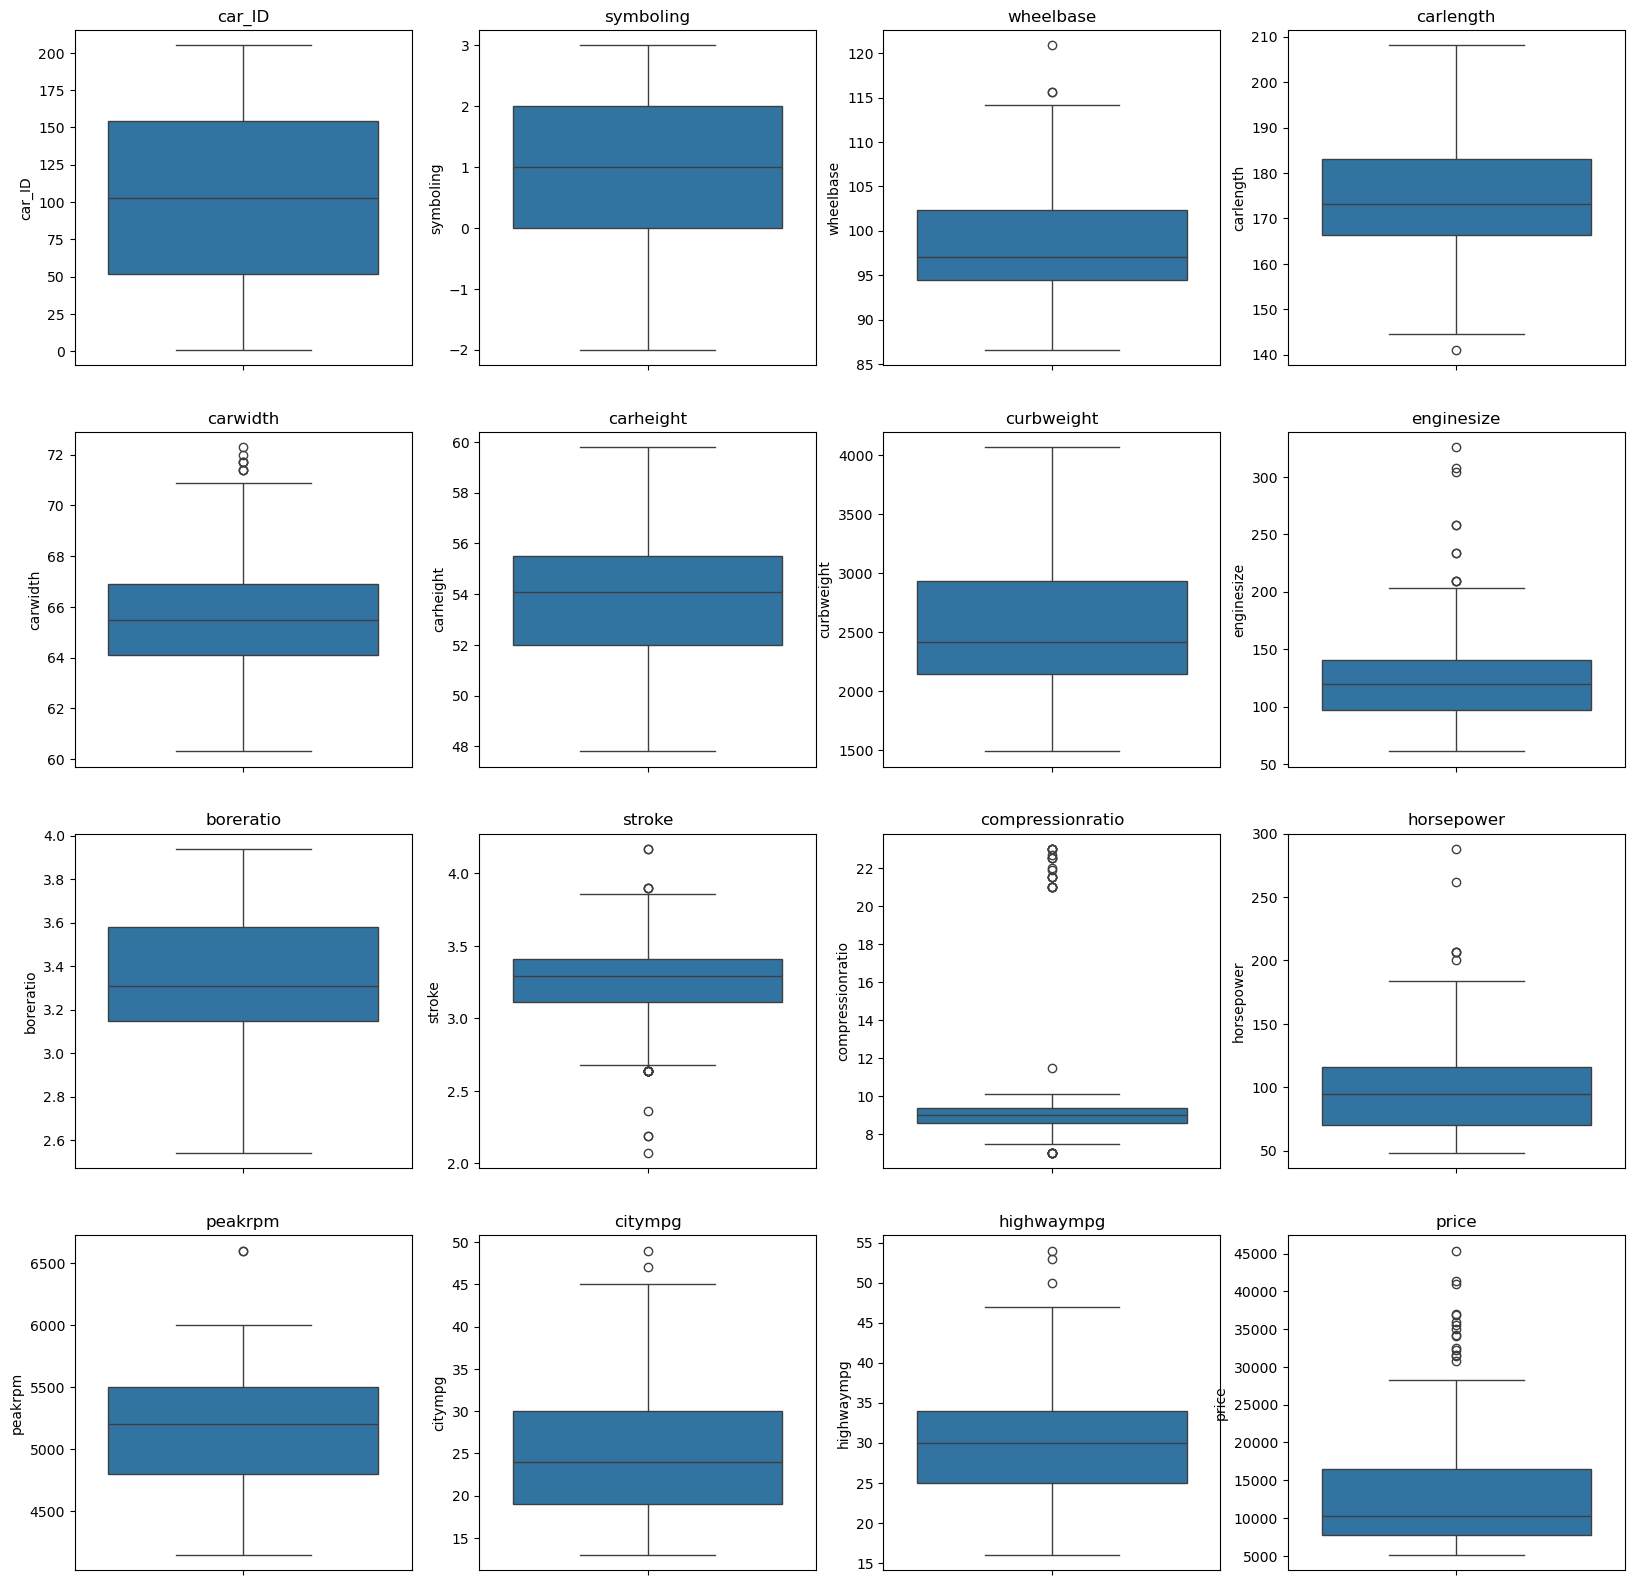

In [120]:
plt.figure(figsize=(20, 20))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(y=df[col])
    plt.title(col)

**now we will visualize the relation between each numerical column and price column**

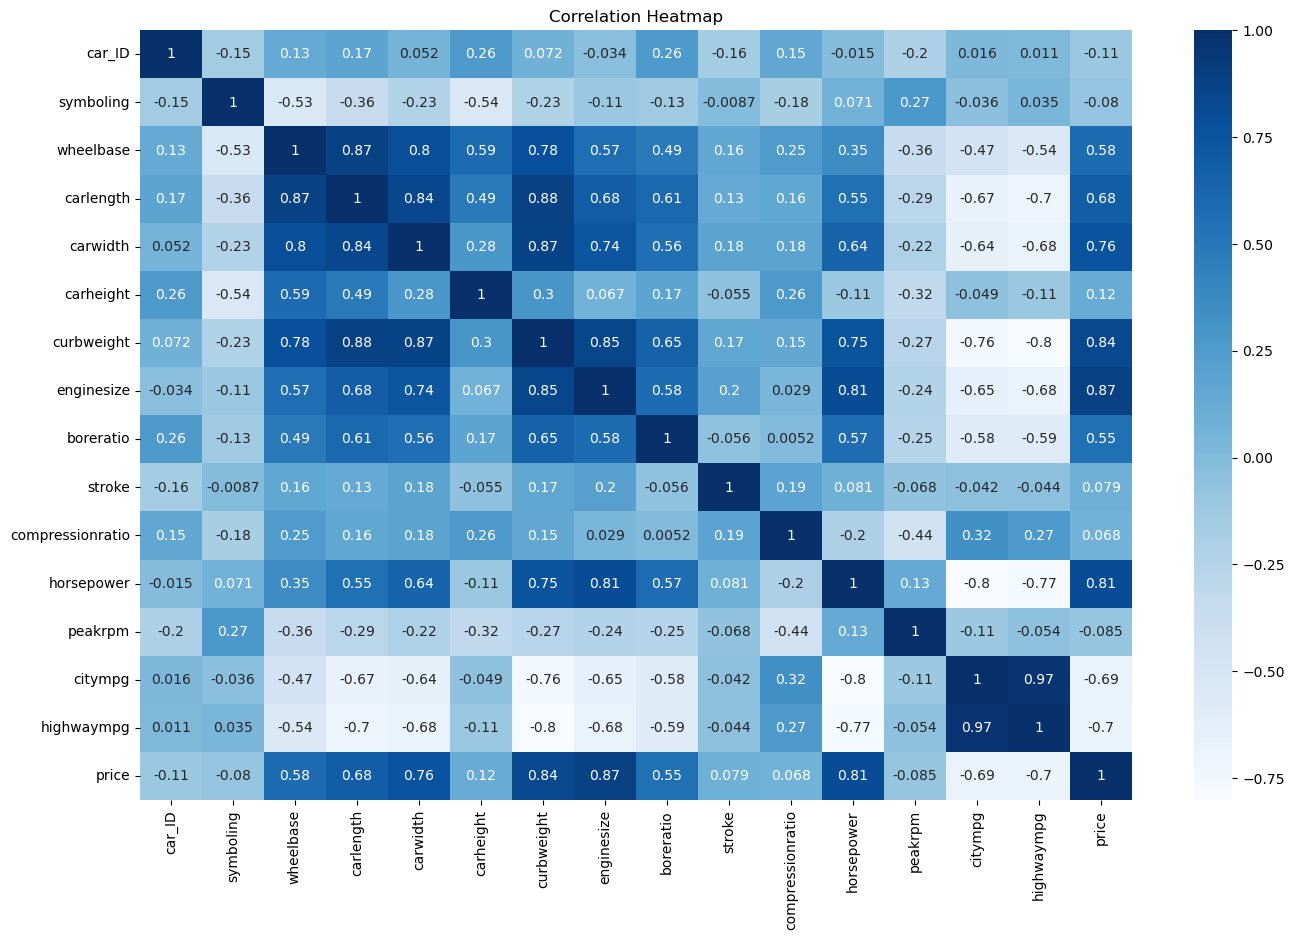

In [121]:
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(16, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()

## Data Preprocessing

### Outliers

In [122]:
import pandas as pd

# Store outlier counts
outlier_counts = {}

# Loop through numerical columns
for col in df.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_counts[col] = len(outliers)

# Show outlier counts
outlier_counts = dict(sorted(outlier_counts.items(), key=lambda x: x[1], reverse=True))
for feature, count in outlier_counts.items():
    print(f"{feature}: {count} outliers")


compressionratio: 28 outliers
stroke: 20 outliers
price: 15 outliers
enginesize: 10 outliers
carwidth: 8 outliers
horsepower: 6 outliers
wheelbase: 3 outliers
highwaympg: 3 outliers
peakrpm: 2 outliers
citympg: 2 outliers
carlength: 1 outliers
car_ID: 0 outliers
symboling: 0 outliers
carheight: 0 outliers
curbweight: 0 outliers
boreratio: 0 outliers


## Corelation

In [123]:
correlation_with_target = df[numerical_columns].corr()['price'].sort_values(ascending=False)
print(correlation_with_target)


price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
car_ID             -0.109093
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64


In [124]:
dropped_columns = []

# Drop features with very low correlation with target
for feature, corr in correlation_with_target.items():
    if abs(corr) < 0.1 and feature != 'price':
        dropped_columns.append(feature)
        print(f"Drop feature: {feature} (corr: {corr:.3f})")


Drop feature: stroke (corr: 0.079)
Drop feature: compressionratio (corr: 0.068)
Drop feature: symboling (corr: -0.080)
Drop feature: peakrpm (corr: -0.085)


In [125]:
# list the dropped columns

df.drop(columns=dropped_columns, inplace=True)

## Building The Model

### Splitting the data

In [126]:
X = df.drop(['price'], axis=1) 
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
numerical_columns = X.select_dtypes(include='number').columns
categorical_columns = X.select_dtypes(include='object').columns

## Data Preprocessing Pipeline

In [127]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression

# Example columns

# Categorical pipeline
categorical_transformer = Pipeline([
    ('encoder', OneHotEncoder(drop='first', handle_unknown='ignore'))
])

# Numeric pipeline
numeric_transformer = Pipeline([
    ('scaler', StandardScaler())
])

# Combine both
preprocessor = ColumnTransformer([
    ('num', numeric_transformer, numerical_columns),
    ('cat', categorical_transformer, categorical_columns)
])




# Linear Regression Model


In [128]:
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', LinearRegression())
])

# Fit the model
pipeline.fit(X_train, y_train)



Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['car_ID', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg',
       'highwaympg'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object'))])),
                ('model', LinearRegression())])

In [129]:
yp = (pipeline.predict(X_test))

r2_score(yp,y_test)

0.8817920188864976

# Ridge Model

In [130]:
from sklearn.linear_model import Ridge

pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', Ridge())
])
pipeline.fit(X_train, y_train)



Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['car_ID', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg',
       'highwaympg'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object'))])),
                ('model', Ridge())])

In [131]:
yp = (pipeline.predict(X_test))

r2_score(yp,y_test)

0.8920625595595801

# Lasso Model

In [132]:
from sklearn.linear_model import Lasso

pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', Lasso())
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['car_ID', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg',
       'highwaympg'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object'))])),
                ('model', Lasso())])

In [133]:
yp = (pipeline.predict(X_test))

r2_score(yp,y_test)

0.8995467715626467

# Optimizing the Models

In [134]:
from sklearn.model_selection import GridSearchCV


# Model dictionary
models = {
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}
    },
    'Ridge': {
        'model': Ridge(),
        'params': {
            'model__alpha': [0.01, 0.1, 1, 10]
        }
    },
    'Lasso': {
        'model': Lasso(max_iter=10000),
        'params': {
            'model__alpha': [0.01, 0.1, 1, 10,15]
        }
    }
}

# Results store
results = []

# Training loop
for model_name, model_info in models.items():
    
    pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', model_info['model'])
    ])

    # Grid Search
    grid_search = GridSearchCV(pipeline, model_info['params'], cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Predictions
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    # Metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    result = {
        'model': model_name,
        'best_params': grid_search.best_params_,
        'r2_score': r2,
        'rmse': rmse
    }
    results.append(result)

    print(f"{model_name} | R²: {r2:.4f} | RMSE: {rmse:.2f}")
    print(result)


/home/aswin/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/aswin/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/aswin/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/aswin/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/aswin/anaconda3/lib/python3.12/site-packages/sklearn/prepro

LinearRegression | R²: 0.8838 | RMSE: 3028.55
{'model': 'LinearRegression', 'best_params': {}, 'r2_score': 0.8838147628101471, 'rmse': np.float64(3028.5524249422733)}


/home/aswin/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/aswin/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/aswin/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/aswin/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/aswin/anaconda3/lib/python3.12/site-packages/sklearn/prepro

Ridge | R²: 0.8965 | RMSE: 2858.15
{'model': 'Ridge', 'best_params': {'model__alpha': 1}, 'r2_score': 0.8965210603418612, 'rmse': np.float64(2858.1538749649135)}


/home/aswin/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.122e+07, tolerance: 8.247e+05
  model = cd_fast.enet_coordinate_descent(
/home/aswin/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.877e+07, tolerance: 8.320e+05
  model = cd_fast.enet_coordinate_descent(
/home/aswin/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

Lasso | R²: 0.8889 | RMSE: 2961.65
{'model': 'Lasso', 'best_params': {'model__alpha': 15}, 'r2_score': 0.8888915544967095, 'rmse': np.float64(2961.646069623795)}


/home/aswin/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/aswin/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/aswin/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [8] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/home/aswin/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [7] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


## Model Performance
### Best parameters

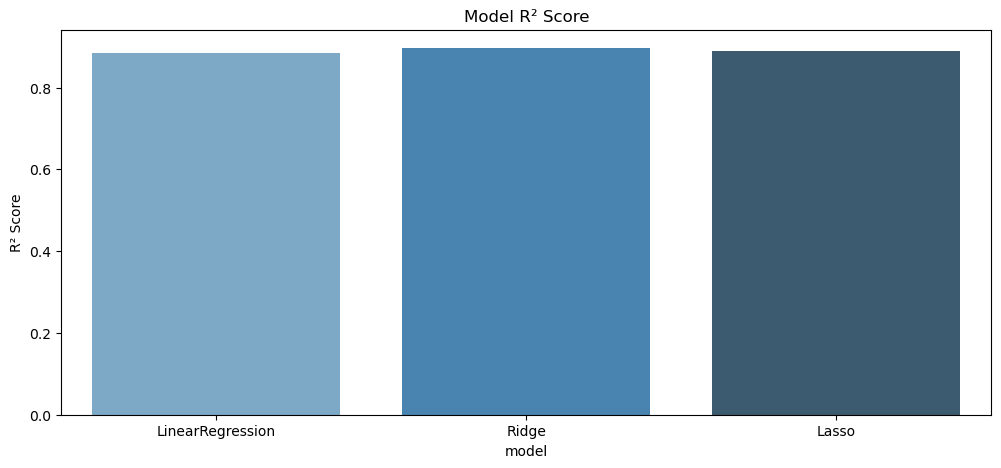

,model,best_params,r2_score,rmse
0,LinearRegression,{},0.883815,3028.552425
1,Ridge,{'model__alpha': 1},0.896521,2858.153875
2,Lasso,{'model__alpha': 15},0.888892,2961.646070


In [135]:
results_df = pd.DataFrame(results)

# Set plot style
plt.figure(figsize=(12, 5))

sns.barplot(data=results_df, x='model', y='r2_score', palette='Blues_d')
plt.title('Model R² Score')
plt.ylabel('R² Score')

plt.show()
results_df

In [136]:
ridge_model = Pipeline([
    ('preprocess', preprocessor),
    ('model', Ridge(alpha=0.1))
    ])


In [137]:
ridge_model.fit(X_train, y_train)


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['car_ID', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'horsepower', 'citympg',
       'highwaympg'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore'))]),
                                                  Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object'))])),
                ('model', Ridge(alpha=0.1))])

In [138]:
y_pred = ridge_model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.2f}")


R² Score: 0.8989
RMSE: 2824.54


In [139]:
import joblib
joblib.dump(ridge_model, 'ridge_car_price_model.pkl')


['ridge_car_price_model.pkl']